In [1]:
import json
with open('01.json', 'r') as f:
    data = json.load(f)

In [2]:
def find_all_tasks(data:dict):
    tasks = []
    for v in data.values():
        if v.get('task_name') not in tasks:
            tasks.append(v.get('task_name'))
    return tasks
tasks = find_all_tasks(data)
print(tasks)

['random_circuit_evolution', 'random_ham_expectation', '2_regular_maxcut']


In [3]:
def group_by_platform(data:dict, platform:str, task_name:str):
    res={}
    for v in data.values():
        if v['task_name'] == task_name:
            task_params = v['task_params']
            if task_params['platform'] == platform:
                framework, n_qubit, t = task_params['framework'], task_params['n_qubit'], v['mean']
                if framework not in res:
                    res[framework]={'n_qubit':[], 'time':[]}
                res[framework]['n_qubit'].append(n_qubit)
                res[framework]['time'].append(t)
    return res

random_circuit_evolution_cpu = group_by_platform(data, 'cpu', "random_circuit_evolution")
print(random_circuit_evolution_cpu['mindquantum'])

{'n_qubit': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], 'time': [0.0007205617194082223, 0.001092812594245462, 0.0016060997458065256, 0.00233305903042064, 0.003609301997166054, 0.005819023824205585, 0.010643327937406652, 0.021202519828198003, 0.04395587070315492, 0.04610284637002384, 0.07566168962740431, 0.1315826130848305, 0.2569057263580023, 0.5502036061941409, 1.0162933073545757, 1.0481009781360626, 1.2687080800533295, 1.5012834072113037, 2.6026183366775513, 3.7818076610565186]}


In [4]:
random_circuit_evolution_gpu = group_by_platform(data, 'gpu', "random_circuit_evolution")
random_ham_expectation_cpu = group_by_platform(data, 'cpu', "random_ham_expectation")
random_ham_expectation_gpu = group_by_platform(data, 'gpu', "random_ham_expectation")
qaoa_2_regular_maxcut_cpu = group_by_platform(data, 'cpu', '2_regular_maxcut')
qaoa_2_regular_maxcut_gpu = group_by_platform(data, 'gpu', '2_regular_maxcut')

In [36]:
import random
def randomcolor():
    colorArr = ['1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']
    color = ""
    for i in range(6):
        color += colorArr[random.randint(0,14)]
    return "#"+color

In [50]:
import matplotlib.pyplot as plt
import matplotlib as mpl

def show_res(task_data, title):
    plt.subplots(dpi=180)
    for k, v in task_data.items():
        ms = 1
        if k == 'mindquantum':
            ms = 2
        plt.plot(v['n_qubit'], v['time'], '--', label=k, c=randomcolor(), lw=ms)
        plt.plot(v['n_qubit'], v['time'], '.', c='black')
    plt.yscale('log')
    plt.legend()
    plt.title(title)
    plt.show()

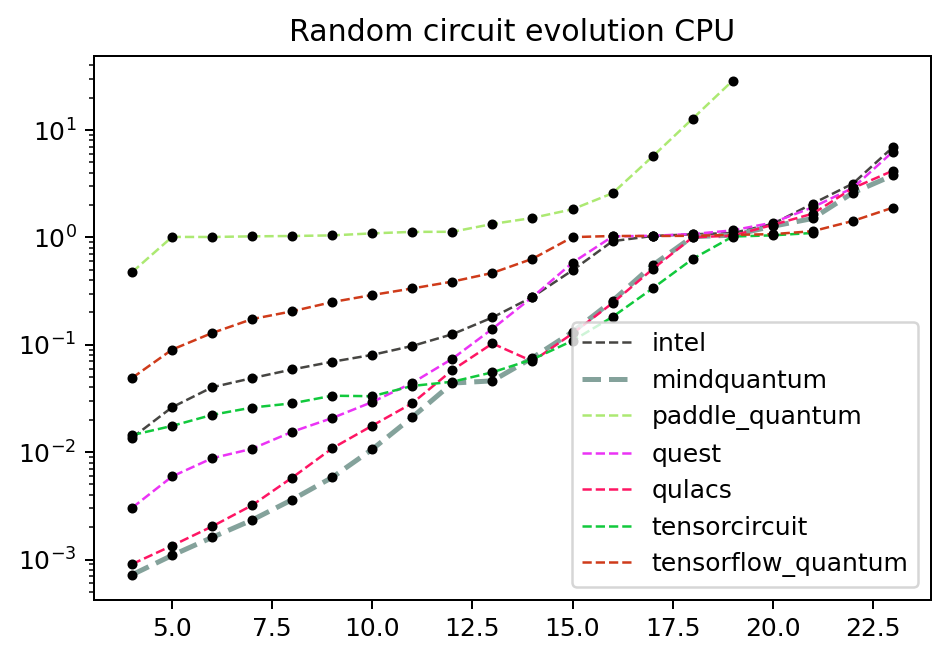

In [57]:
show_res(random_circuit_evolution_cpu, 'Random circuit evolution CPU')

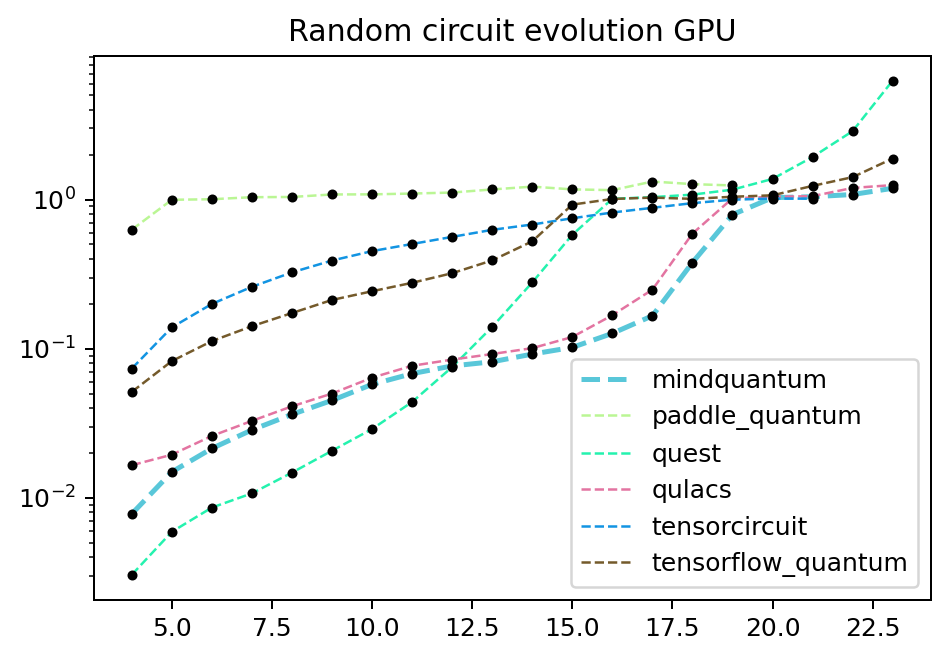

In [58]:
show_res(random_circuit_evolution_gpu, 'Random circuit evolution GPU')

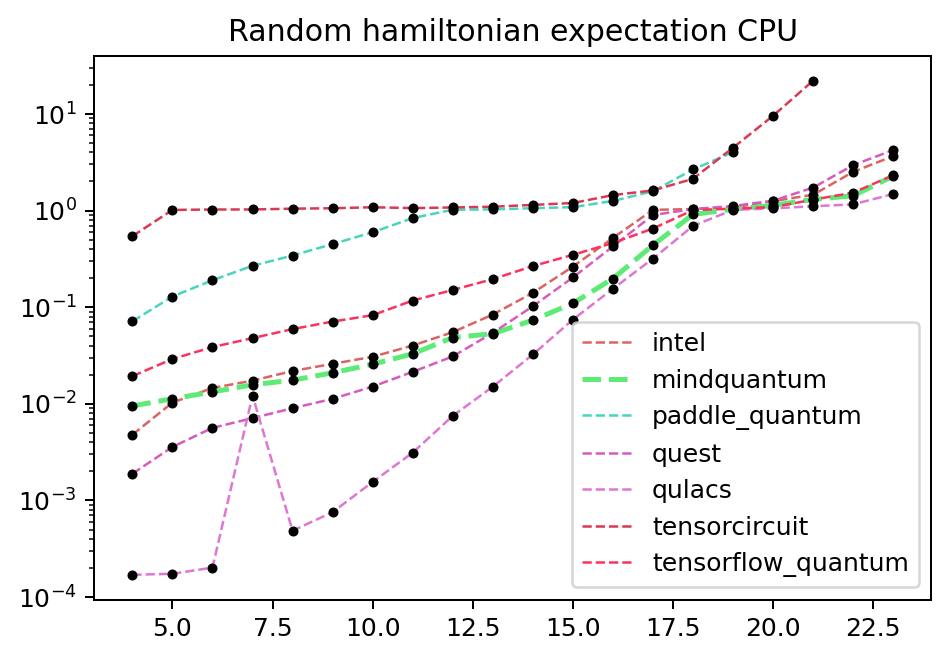

In [62]:
show_res(random_ham_expectation_cpu, 'Random hamiltonian expectation CPU')

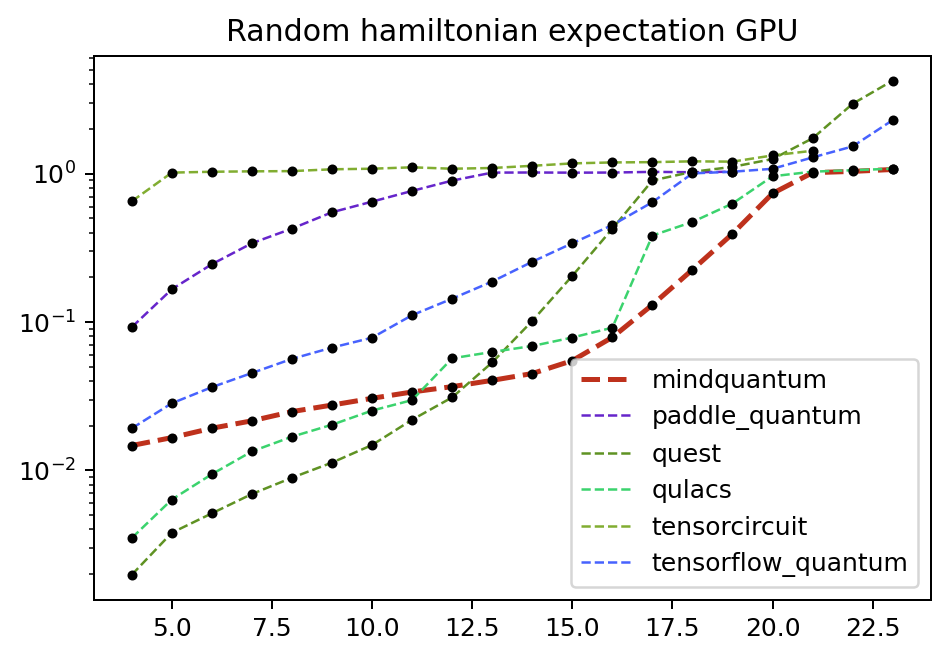

In [63]:
show_res(random_ham_expectation_gpu, 'Random hamiltonian expectation GPU')

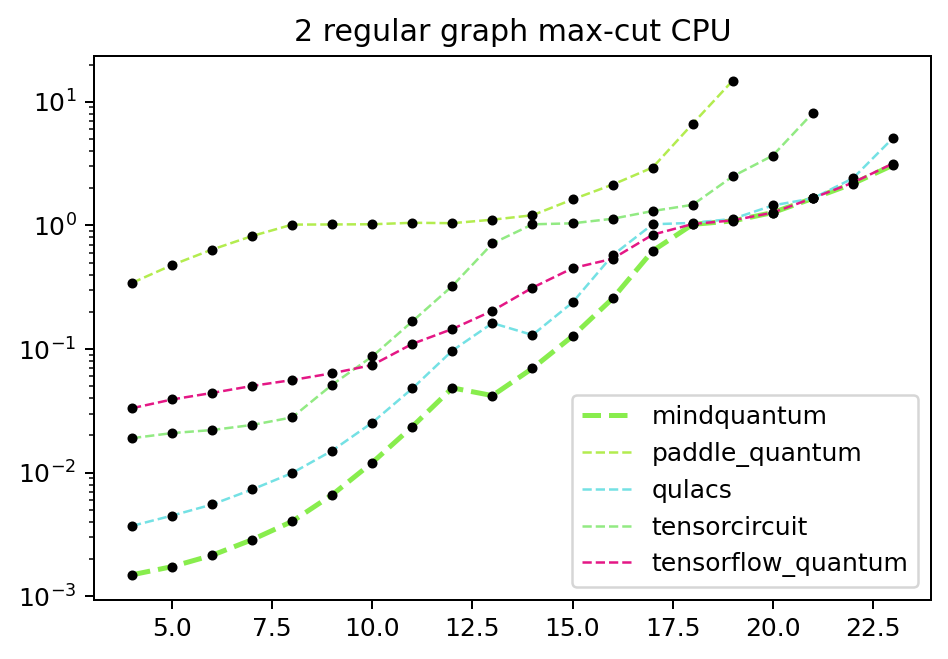

In [65]:
show_res(qaoa_2_regular_maxcut_cpu, '2 regular graph max-cut CPU')

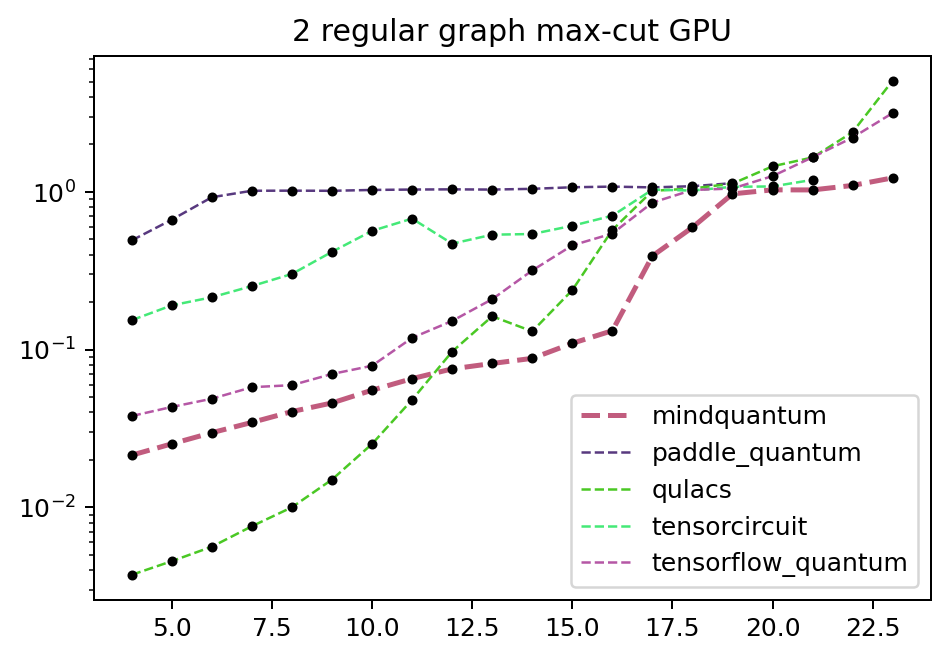

In [66]:
show_res(qaoa_2_regular_maxcut_gpu, '2 regular graph max-cut GPU')